In [1]:
!pip install numdifftools
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import warnings
import math
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 4.3 MB/s eta 0:00:00


### Q1
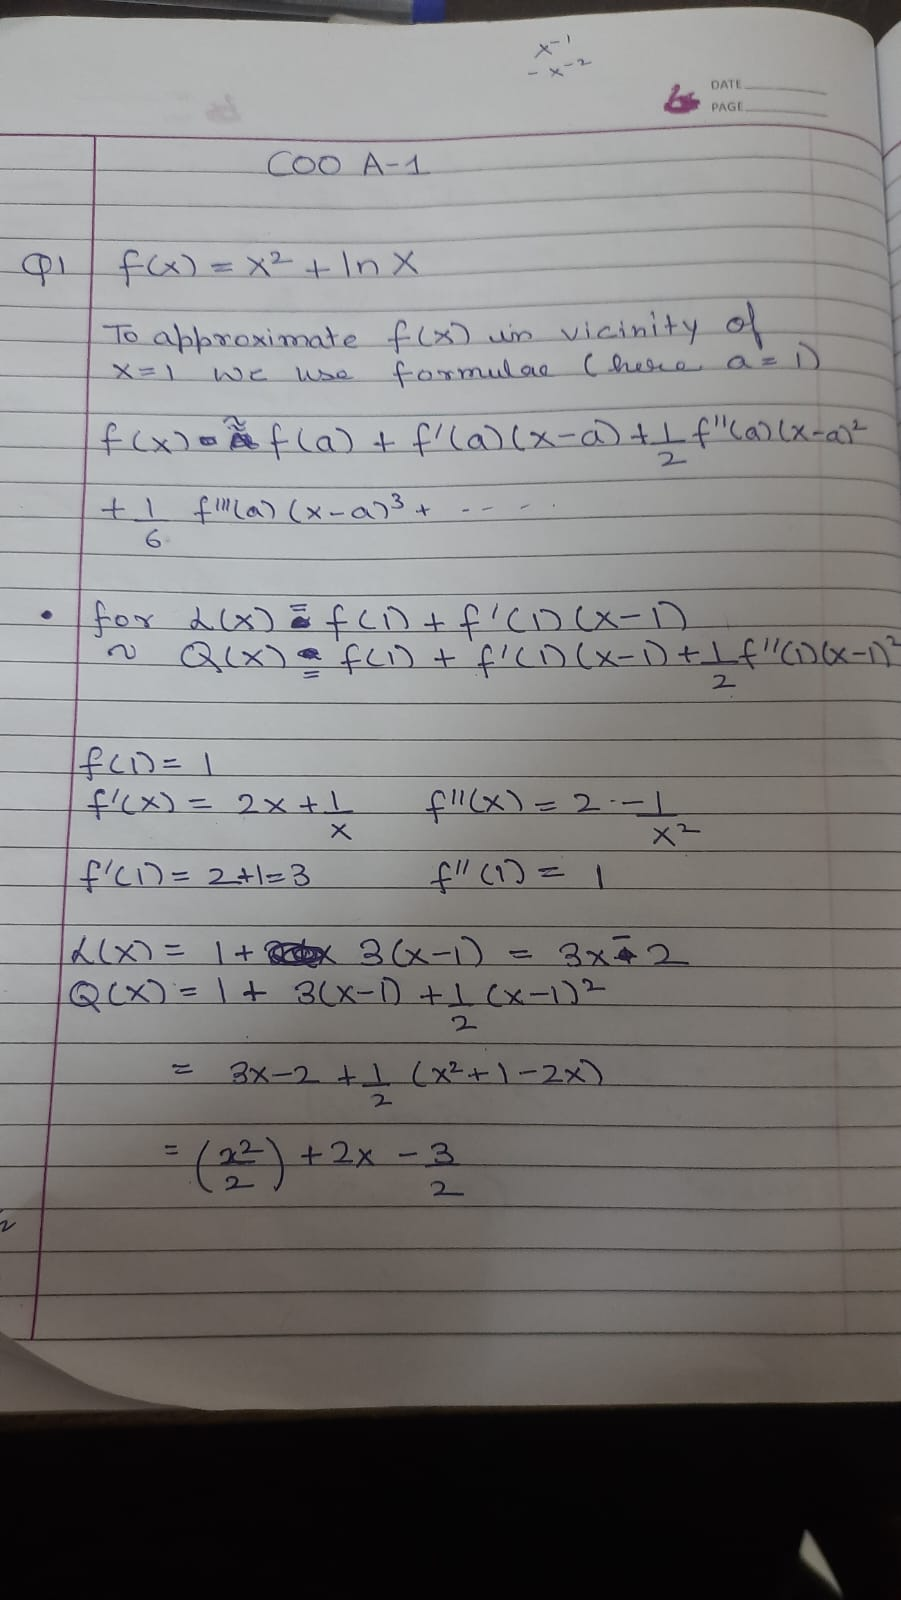

In [2]:
def f(x):
  return x**2 + np.log(x)

def L(x):
  df = nd.Derivative (f , full_output = True )  # df = 2x + (1/x)
  val,info = df(1)  # val = 2+(1/1) = 3
  # print(f"df'=({val})")
  # L(x) = 1 + 3(x-1) = 3x - 2
  return 3*x - 2

  # return f(1) + (x-1)*val

  

def Q(x):
  df = nd.Derivative (f , full_output = True ) # df = 2x+(1/x)
  val1,info1 = df(1) # val1 = 2+(1/1) = 3
  df2 = nd . Derivative (f , n =2 , full_output = True ) # df2 = 2 - (1/x^2)
  val2,info2 = df2(1) # val2 = 2 -(1/1) = 1
  # Q(x) = 1 + 3(x-1)+(1/2)*(1)*(x-1)^2 = 0.5(x-1)^2+(3x-2) = 0.5*x^2+2x-1.5
  return (0.5*(x**2))+(2*x)-1.5

  # return f(1)+val1*(x-1)+(1/2)*(val2)*((x-1)**2)
 

In [3]:
x = np.linspace(0,2, num=50)
f_x = []
L_x = []
Q_x = []

for i in range(len(x)):
  f_x.append(f(x[i]))
  L_x.append(L(x[i]))
  Q_x.append(Q(x[i]))

f_x = np.array(f_x)
L_x = np.array(L_x)
Q_x = np.array(Q_x)

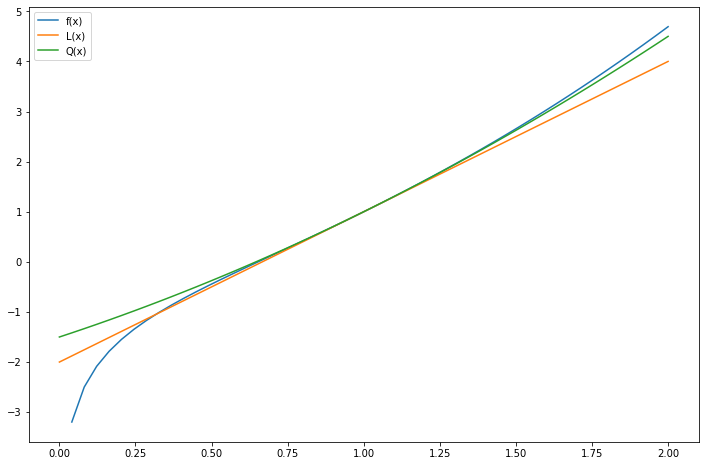

In [4]:
plt.figure(figsize=(12,8))
plt.plot(x,f_x,label="f(x)")
plt.plot(x,L_x,label="L(x)")
plt.plot(x,Q_x,label="Q(x)")
plt.legend()

In [5]:
e_Lx = [] # Linear Error
e_Qx = [] # Quadratic Error
# adding errors of 50 data points in [0,2]
# divinding then simultaneously by (x-1) and (x-1)^2 in Linear and Quadratic Approximation respectively
# e_L(x) = f(x)-L(x) they are then divded by (x-1)
# e_Q(x) = f(x) - Q(x) they are then divded by (x-1)^2

for i in range(len(x)):
  e_Lx.append(   (f(x[i]) - L(x[i]))/(x[i]-1)      )   
  e_Qx.append(   (f(x[i]) - Q(x[i]))/((x[i]-1)**2)    ) 


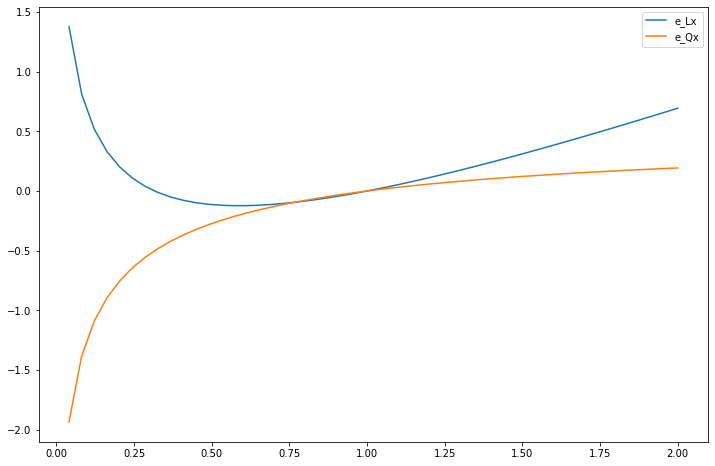

In [6]:
plt.figure(figsize=(12,8))
plt.plot(x,e_Lx,label="e_Lx")
plt.plot(x,e_Qx,label="e_Qx")
plt.legend()

### **Q2**


```
starting from x,y = (1,1)
alpha = 0.3
beta = 0.8
tol = 1e-6

Minimum of f is at (1.5349900466365383, 0.8862269057799061) and f(x_min,y_min) = 1.0017300231197404e-14 approximately 0. 

```




In [2]:
def f(x,y):
    return (x**2 - 3*(y**2))**2 + (np.sin(x**2 + y**2))**2

# computing first order derivatives of f wrt x and y
def df(x,y):
  print(x,y)
  dx = 4*x*(x**2 - 3*(y**2)) + 4*x*np.cos(x**2 + y**2)*np.sin(x**2 + y**2)
  dy = -12*y*(x**2 - 3*y**2) + 4*y*np.cos(x**2 + y**2)*np.sin(x**2 + y**2)
  # dx_dy = dy_dx = -8*y*x*((np.sin(x**2 + y**2))**2 - (np.cos(x**2 + y**2))**2 + 3)
  return dx,dy


def lineSearch(x,y,alpha,beta,d1,d2):
  tx=ty= 1
  dx,dy = df(x,y)

  Df_t = tx*d1*dx + ty*d2*dy
 
  
  while(f(x,y) - f(x+tx*d1,y+ty*d2) < -alpha*(Df_t)):
    tx = beta * tx
    ty = beta * ty
    Df_t = tx*d1*dx + ty*d2*dy
    # print(abs(f(x,y) - f(x+tx*d1,y+ty*d2) + alpha*(Df_t)))
  
  return tx,ty

# constructing Hessian matrix (inbuilt func and by calculating each derivative)
def Hessian(x,y):
  # hessian = np.zeros((2,2),dtype=float)
  # hessian[0][0]  = -8*(x**2)*((np.sin(x**2 + y**2))**2) + 4*(np.sin(x**2 + y**2))*(np.cos(x**2 + y**2)) + 8*(x**2)*((np.cos(x**2 + y**2))**2) + 12*(x**2) - 12*(y**2)
  # hessian[1][1]  =  -8*(y**2)*((np.sin(x**2 + y**2))**2) + 4*(np.sin(x**2 + y**2))*(np.cos(x**2 + y**2)) + 8*(y**2)*((np.cos(x**2 + y**2))**2) + 108*(y**2) - 12*(x**2)
  # hessian[1][0]= hessian[0][1] = -8*y*x*((np.sin(x**2 + y**2))**2 - (np.cos(x**2 + y**2))**2 + 3)
  # return hessian
  f_x = lambda x,y : f(x,y)
  Hfun = nd.Hessian(f_x)
  hessian = Hfun(x,y)
  return hessian
  
# return bool wheter the given matrix is positive definite 
def check_positive_def(matrix):
    w, v = np.linalg.eig(matrix)
    return all(eigenvalue > 0 for eigenvalue in w)

In [3]:
# runs combination descent algo and returns min (x,y) on the basis of tolerance
def combinationGradient(x,y,tol,alpha,beta):
  dx,dy = df(x,y) 
  Hf = Hessian(x,y)
    
  gradient_f = np.array([[dx],[dy]])

  # Choosing Directional Derivatives
  if(check_positive_def(Hf)==True):
      d = np.linalg.inv(Hf) * ( - gradient_f )
  else:
      d = - gradient_f

  norm = math.sqrt((dx)**2 + (dy)**2) 
  while(norm>tol):  # while norm of gradient is less than tolerance
      
      d1,d2 = d[0][0],d[1][0]

      # line search
      tx,ty = lineSearch(x,y,alpha,beta,d1,d2)

      # x = x + td (updating)
      x = x + tx * d1
      y = y + ty * d2

      # updating derivatives,Hessian Matrix,gradient,norm
      dx,dy = df(x,y)
      Hf = Hessian(x,y)
      gradient_f = np.array([[dx],[dy]])
      if(check_positive_def(Hf)==True):
          d = np.linalg.inv(Hf) * ( - gradient_f )
      else:
          d = - gradient_f

      norm = math.sqrt((dx)**2 + (dy)**2) 

  return x,y

In [5]:
# hardcoding the values
x = 1
y = 1
alpha = 0.3
beta = 0.8
tol = 1e-6

x_min, y_min = combinationGradient(x,y,tol,alpha,beta)
print(f"Minimum of f is at ({x_min}, {y_min}) and f(x_min,y_min) = {f(x_min,y_min)}")

1 1
1 1
1.1713818715627509 0.5949211192593267
1.1713818715627509 0.5949211192593267
1.1432779208446526 0.693107082211528
1.1432779208446526 0.693107082211528
1.2514072995607508 0.6564591930521666
1.2514072995607508 0.6564591930521666
1.2794094919500376 0.8266946510185863
1.2794094919500376 0.8266946510185863
1.4232344224389084 0.7511500511110295
1.4232344224389084 0.7511500511110295
1.4456577082159645 0.9018519631593869
1.4456577082159645 0.9018519631593869
1.5042998353592751 0.8500322399293635
1.5042998353592751 0.8500322399293635
1.514301960855067 0.8925950070325982
1.514301960855067 0.8925950070325982
1.5303193677252396 0.8773893370176921
1.5303193677252396 0.8773893370176921
1.529985137484422 0.8869270912261553
1.529985137484422 0.8869270912261553
1.53346601545752 0.8843046474314028
1.53346601545752 0.8843046474314028
1.533798143481357 0.8861615821212976
1.533798143481357 0.8861615821212976
1.53472254996953 0.8856973488043647
1.53472254996953 0.8856973488043647
1.5346920078563495 0

In [6]:
print(f"Minimum of f is at ({x_min}, {y_min}) and f(x_min,y_min) = {f(x_min,y_min)}")

Minimum of f is at (1.5349900466365383, 0.8862269057799061) and f(x_min,y_min) = 1.0017300231197404e-14


Q3

**Framing**<br>


To minimize potential function Ψ(x) = − Σ log gj (x) (j=1 to m) wrt to x<br>
The vector x which minimizes Ψ(x) is Analytic center.(Here **x**=(x1,x2)) i.e  **x**∈R2. Plugging in the given functions we get,



```
Ψ(x) = -(log(g1(x1,x2))+log(g2(x1,x2))+log(g3(x1,x2)))
Ψ(x) = -log(g1(x1,x2)*g2(x1,x2)*g3(x1,x2))
Ψ(x) = log(1/(g1(x1,x2)*g2(x1,x2)*g3(x1,x2)))
```


Note: However the function we have to minimize involves a log of these functions where these constraints are implicit. (g1(x1,x2),g2(x1,x2),g3(x1,x2) >=0 ). Thus for x,y  belonging to domain of the log function if x < y then log(x) < log(y).

Since log is strictly monotonically increasing function, minimizing Ψ(**x**) is equivalent to minimizing f(x1,x2) (or f(**x**)) where f(x1,x2)=1/(g1(x1,x2)*g2(x1,x2)*g3(x1,x2))=1/(g1g2g3).



```
Starting from 
(x1,x2) = (0.25,0.25)
alpha = 0.3
beta = 0.8
tol = 1e-5

After running the code we get analytic center as **x** = (x1,x2) = (0.33333332495462936, 0.33333332495462936) and the value of f(x1,x2) = 27.000000000000046                                
```









In [11]:
import math
def g1(x1,x2):
  return  2*x2 - x1

def g2(x1,x2):
  return 2*x1 - x2

def g3(x1,x2):
  return 1 - x1 - x2

def potential(x1,x2):
  return -(np.log(g1(x1,x2))+np.log(g2(x1,x2))+np.log(g3(x1,x2)))

# i want to minimize potential function (pf(x1,x2))
# pf(x1,x2) = -(log(g1(x1,x2))+log(g2(x1,x2))+log(g3(x1,x2)))
# pf(x1,x2) = -log(g1(x1,x2)*g2(x1,x2)*g3(x1,x2))
# pf(x1,x2) = log(1/(g1(x1,x2)*g2(x1,x2)*g3(x1,x2)))

# Since log is monotonically increasing function, minimizing pf(x1,x2) is equivalent to minimizing f(x1,x2) =   1/(g1(x1,x2)*g2(x1,x2)*g3(x1,x2)) =1/(g1g2g3)


def f(x1,x2):
  return 1./(g1(x1,x2)*g2(x1,x2)*g3(x1,x2))

# writing first order derivatives of f wrt x and y
def df(x,y):
  print(x,y)
  dx = -( (6.*(x**2) + (-6*y - 4)*x - 3*(y**2) + 5*y) )/(((x-2*y)**2)*((x+y-1)**2)*((2*x-y)**2) )
  dy = -((6.*(y**2) + (-6*x - 4)*y - 3*(x**2) + 5*x))/(((y-2*x)**2)*((x+y-1)**2)*((2*y-x)**2) )
  return dx,dy
  

def Hessian(x1,x2):
    f_x = lambda x_1,x_2 : f(x_1,x_2)
    Hfun = nd.Hessian(f_x)
    hessian = Hfun(x1,x2)
    return hessian

# same as before
def combinationGradient(x,y,tol,alpha,beta):
  dx,dy = df(x,y) 
  Hf = Hessian(x,y)
    
  gradient_f = np.array([[dx],[dy]])

  if(check_positive_def(Hf)==True):
      d = np.linalg.inv(Hf) * ( - gradient_f )
  else:
      d = - gradient_f

  norm = math.sqrt((dx)**2 + (dy)**2) 
  while(norm>tol):
      # print(d)
      d1,d2 = d[0][0],d[1][0]
      # line search
      tx,ty = lineSearch(x,y,alpha,beta,d1,d2)

      # x = x + td (updating)
      x = x + tx * d1
      y = y + ty * d2

      dx,dy = df(x,y)
      Hf = Hessian(x,y)
      gradient_f = np.array([[dx],[dy]])
      if(check_positive_def(Hf)==True):
          d = np.linalg.inv(Hf) * ( - gradient_f )
      else:
          d = - gradient_f

      norm = math.sqrt((dx)**2 + (dy)**2) 

  return x,y

# same as before
def lineSearch(x,y,alpha,beta,d1,d2):
  tx=ty= 1
  dx,dy = df(x,y)

  Df_t = tx*d1*dx + ty*d2*dy
 
  
  while(f(x,y) - f(x+tx*d1,y+ty*d2) < -alpha*(Df_t)):
    tx = beta * tx
    ty = beta * ty
    Df_t = tx*d1*dx + ty*d2*dy


    # print(abs(f(x,y) - f(x+tx*d1,y+ty*d2) + alpha*(Df_t)))
  
  return tx,ty

In [12]:
x1,x2 = 0.25,0.25
alpha = 0.3
beta = 0.8
tol = 1e-5

x1_min, x2_min = combinationGradient(x1,x2,tol,alpha,beta)
print(f"Minimum of f is at ({x1_min}, {x2_min}) and f(x_min,y_min) = {f(x1_min,x2_min)}")

0.25 0.25
0.25 0.25
0.27272727259635293 0.27272727259635293
0.27272727259635293 0.27272727259635293
0.29249011841490963 0.29249011841490963
0.29249011841490963 0.29249011841490963
0.30795510228812945 0.30795510228812945
0.30795510228812945 0.30795510228812945
0.31869809366718743 0.31869809366718743
0.31869809366718743 0.31869809366718743
0.32536620996075377 0.32536620996075377
0.32536620996075377 0.32536620996075377
0.3291577348587351 0.3291577348587351
0.3291577348587351 0.3291577348587351
0.33119295123694203 0.33119295123694203
0.33119295123694203 0.33119295123694203
0.3322493580748414 0.3322493580748414
0.3322493580748414 0.3322493580748414
0.33278781520547907 0.33278781520547907
0.33278781520547907 0.33278781520547907
0.33305968078414505 0.33305968078414505
0.33305968078414505 0.33305968078414505
0.3331962823102913 0.3331962823102913
0.3331962823102913 0.3331962823102913
0.3332647514613115 0.3332647514613115
0.3332647514613115 0.3332647514613115
0.33329902828544034 0.33329902828544

In [ ]:
print(f"Minimum of f is at ({x1_min}, {x2_min}) and f(x_min,y_min) = {f(x1_min,x2_min)}")